In [1]:
import csv, sqlite3, matplotlib
import pandas as pd
from pandas import DataFrame, Series
from collections import defaultdict
import matplotlib.pyplot as plt

In [65]:
data1 = pd.read_csv('co-est2019-alldata.csv')
data2 = pd.read_csv('COVID-19_Historical_Data_Table.csv')

In [71]:
dict1 = defaultdict(int)

dict2 = {}
dict3 = {}
FIPS = None
for i in range(len(data1)):
    if data1["STNAME"][i] == "Wisconsin":
        FIPS = (2-len(str(data1["STATE"][i])))* "0" + str(data1["STATE"][i]) + (3-len(str(data1["COUNTY"][i])))* "0" + str(data1["COUNTY"][i])
        
        dict2[data1["CTYNAME"][i]] = FIPS
        dict3[data1["CTYNAME"][i]] = data1["POPESTIMATE2019"][i]
        

dict4 = {}
county = None
list1 = []
for i in range(len(data2)):
    if data2["NEGATIVE"][i] == "NaN":
        data2["NEGATIVE"][i] = 0
    if data2["POSITIVE"][i] == "NaN":
        data2["POSITIVE"][i] = 0
    if data2["GEO"][i] == "County":
        county = data2["NAME"][i] + " " + data2["GEO"][i]
    if data2["GEO"][i] == "State":
        county = "Wisconsin"
    fraction_positive = data2["POSITIVE"][i]/(data2["NEGATIVE"][i] + data2["POSITIVE"][i])
    
    dict4 = {"Date": data2["LoadDttm"][i][:10], "FIPS": dict2[county] , "county": county, "population": dict3[county], "fraction of positive tests": fraction_positive}
    list1.append(dict4)
    
df = DataFrame(list1)

a = df.pivot(index = "county", columns = "Date", values = "fraction of positive tests")

list1 = []
for i in range(len(df)):
    list2 = []
    list2.append(df["FIPS"][i])
    list2.append(df["county"][i])
    list2.append(df["population"][i])
    list1.append(list2)
    
b = DataFrame(list1)
b = b[:73]
b["FIPS"] = b[0]
b.pop(0)
b["county"] = b[1]
b = b.set_index(1)
b["population"] = b[2]
b.pop(2)

result = pd.concat([b, a], axis = 1, sort = False)
r = result.reset_index()
r.pop("index")
r = r.sort_values("population", ascending = True)
r = r.reset_index()
r.pop("index")
r.head()

,FIPS,county,population,2020/03/15,2020/03/16,2020/03/17,2020/03/18,2020/03/19,2020/03/20,2020/03/21,...,2020/05/18,2020/05/19,2020/05/20,2020/05/21,2020/05/22,2020/05/23,2020/05/24,2020/05/25,2020/05/26,2020/05/27
0,55037,Florence County,4295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.009434,0.009132,0.009009,0.008929,0.008511,0.008368,0.008368,0.008368,0.008333,0.008333
1,55078,Menominee County,4556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.012346,0.011765,0.011050,0.006309,0.003210,0.003110,0.004594,0.004594,0.004594,0.003891
2,55051,Iron County,5687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.026316,0.025000,0.024096,0.010471,0.010417,0.010204,0.009662,0.008850,0.008811,0.008734
3,55091,Pepin County,7287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003300,0.003247,0.003215,0.003175,0.003106,0.003077,0.003077,0.002874,0.002825,0.002817
4,55041,Forest County,9004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.035156,0.034749,0.042146,0.040892,0.040293,0.039711,0.039568,0.042857,0.042857,0.081356


In [4]:
dict1 = defaultdict(int)

dict2 = {}
dict3 = {}
FIPS = None
for i in range(len(data1)):
    if data1["STNAME"][i] == "Wisconsin":
        FIPS = (2-len(str(data1["STATE"][i])))* "0" + str(data1["STATE"][i]) + (3-len(str(data1["COUNTY"][i])))* "0" + str(data1["COUNTY"][i])
        
        dict2[data1["CTYNAME"][i]] = FIPS
        dict3[data1["CTYNAME"][i]] = data1["POPESTIMATE2019"][i]
        


dict4 = {}
county = None
list1 = []
for i in range(len(data2)):
    if data2["NEGATIVE"][i] == "NaN":
        data2["NEGATIVE"][i] = 0
    if data2["POSITIVE"][i] == "NaN":
        data2["POSITIVE"][i] = 0
    if data2["GEO"][i] == "County":
        county = data2["NAME"][i] + " " + data2["GEO"][i]
    if data2["GEO"][i] == "State":
        county = "Wisconsin"
    tests_per_count = (data2["NEGATIVE"][i] + data2["POSITIVE"][i])/dict3[county]
    
    dict4 = {"Date": data2["LoadDttm"][i][:10], "FIPS": dict2[county] , "county": county, "population": dict3[county], "tests per capita": tests_per_count}
    list1.append(dict4)

df = DataFrame(list1)

a = df.pivot(index = "county", columns = "Date", values = "tests per capita")

list1 = []
for i in range(len(df)):
    list2 = []
    list2.append(df["FIPS"][i])
    list2.append(df["county"][i])
    list2.append(df["population"][i])
    list1.append(list2)
    
b = DataFrame(list1)
b = b[:73]
b["FIPS"] = b[0]
b.pop(0)
b["county"] = b[1]
b = b.set_index(1)
b["population"] = b[2]
b.pop(2)

result1 = pd.concat([b, a], axis = 1, sort = False)
res = result1.reset_index()
res.pop("index")
res = res.sort_values("population", ascending = True)
res = res.reset_index()
res.pop("index")
res.head()

,FIPS,county,population,2020/03/15,2020/03/16,2020/03/17,2020/03/18,2020/03/19,2020/03/20,2020/03/21,...,2020/05/18,2020/05/19,2020/05/20,2020/05/21,2020/05/22,2020/05/23,2020/05/24,2020/05/25,2020/05/26,2020/05/27
0,55037,Florence County,4295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.049360,0.050990,0.051688,0.052154,0.054715,0.055646,0.055646,0.055646,0.055879,0.055879
1,55078,Menominee County,4556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.035558,0.037313,0.039728,0.069579,0.136743,0.141133,0.143327,0.143327,0.143327,0.169227
2,55051,Iron County,5687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.013364,0.014067,0.014595,0.033585,0.033761,0.034465,0.036399,0.039740,0.039916,0.040267
3,55091,Pepin County,7287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.041581,0.042267,0.042679,0.043228,0.044188,0.044600,0.044600,0.047756,0.048580,0.048717
4,55041,Forest County,9004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.028432,0.028765,0.028987,0.029876,0.030320,0.030764,0.030875,0.031097,0.031097,0.032763


In [5]:
%matplotlib inline
matplotlib.rcParams["font.size"] = 12

Text(0, 0.5, 'fraction of positive tests')

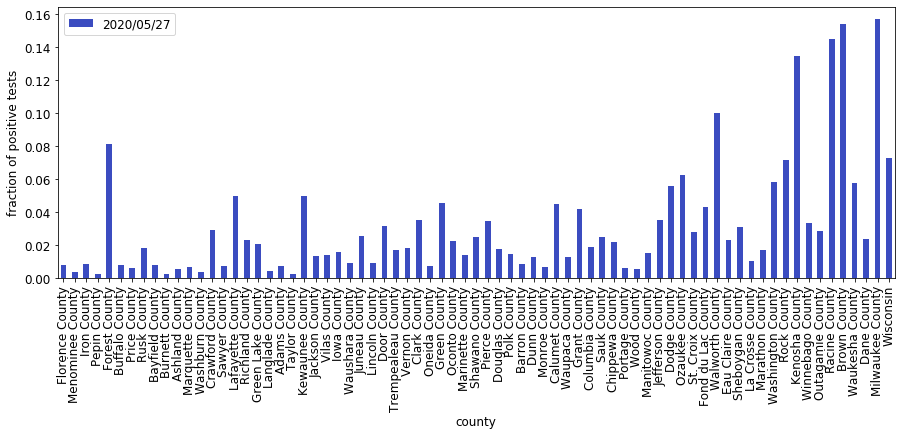

In [24]:
# fraction of positive tests for all counties on 2020/05/12
# graph is sorted by population in ascending order

a = r[["county","2020/05/27"]].plot(x="county", kind="bar",figsize=(15,5))
a.set_ylabel("fraction of positive tests")

In [72]:
from matplotlib import rcParams, cycler, colors
import numpy as np


N = 18
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))

r1 = r.drop(72)

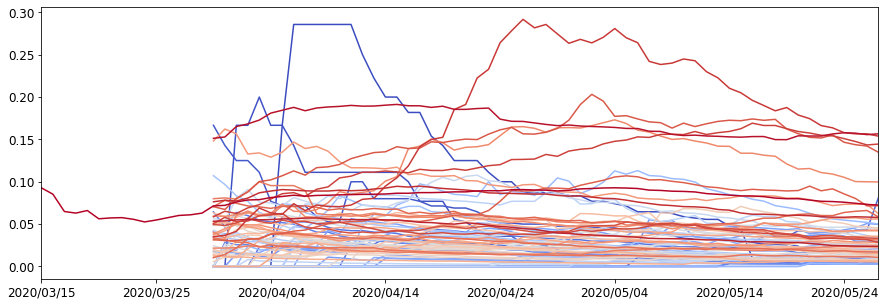

In [86]:
# fraction of postive cases for all counties

rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 73)))
for i in range(len(r)):
    r.loc[i][3:].plot(figsize = (15,5))

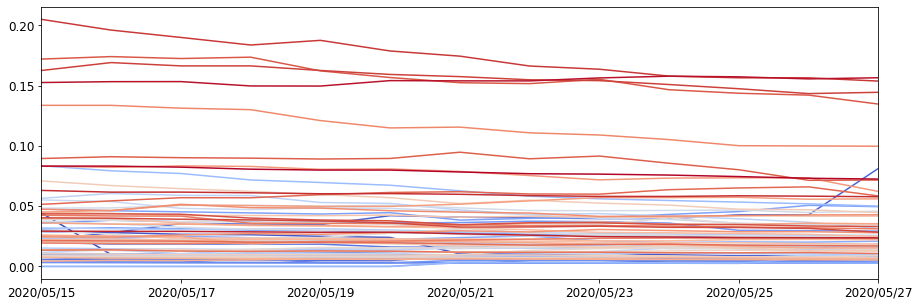

In [87]:
# fraction of postive cases for all counties 
# since 2020/05/15

for i in range(len(r)):
    r.loc[i][64:].plot(figsize = (15,5))

In [88]:
# Next Few graphs are the fraction of positive cases, where the counties are divided into four 
# groups--quartiles of the population distribution and plot, with all four plots having the 
# same y-axis scale.

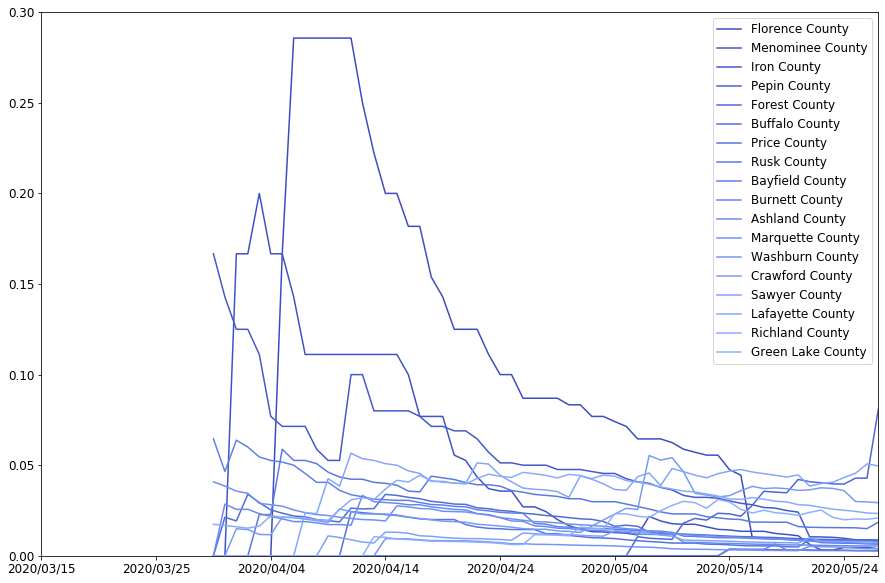

In [90]:
# 1st quartile of population

rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 0.25, N)))

for i in range(0, int(len(r)/4)):
    result.loc[r.loc[i][1]][3:].plot(figsize = (15, 10), ylim = (0,0.30), legend = True) 
    

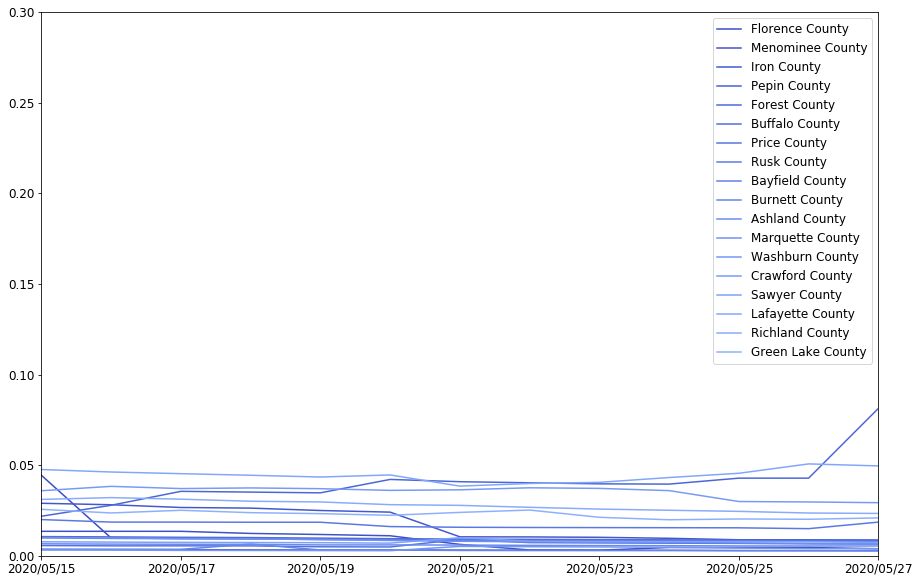

In [91]:
# 1st quartile of population
# since 2020/05/15

rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 0.25, N)))

for i in range(0, int(len(r)/4)):
    result.loc[r.loc[i][1]][64:].plot(figsize = (15, 10), ylim = (0,0.30), legend = True) 
    

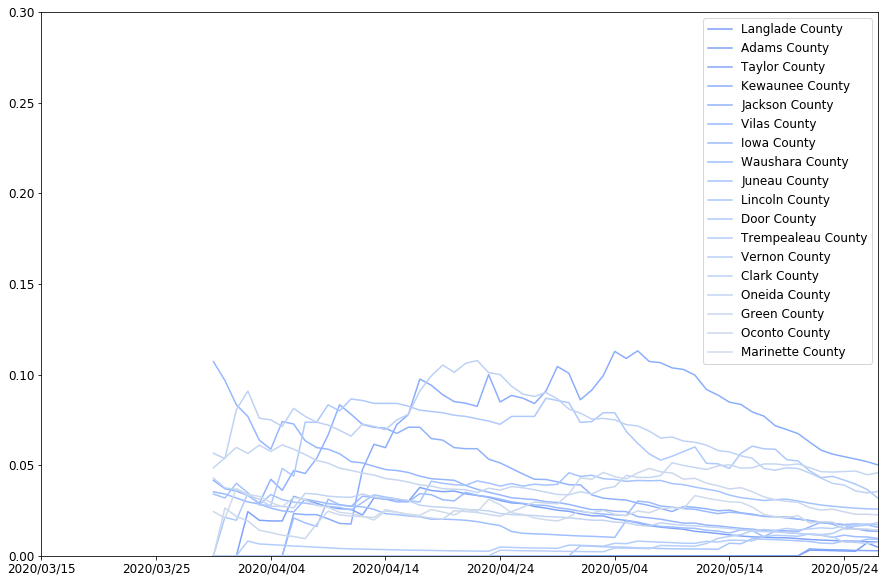

In [32]:
# 2nd quartile of population

rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(.20, .45, N)))

for i in range(int(len(r)/4), int(len(r)/2)):
    result.loc[r.loc[i][1]][3:].plot(figsize = (15,10), ylim = (0,0.30), legend = True)

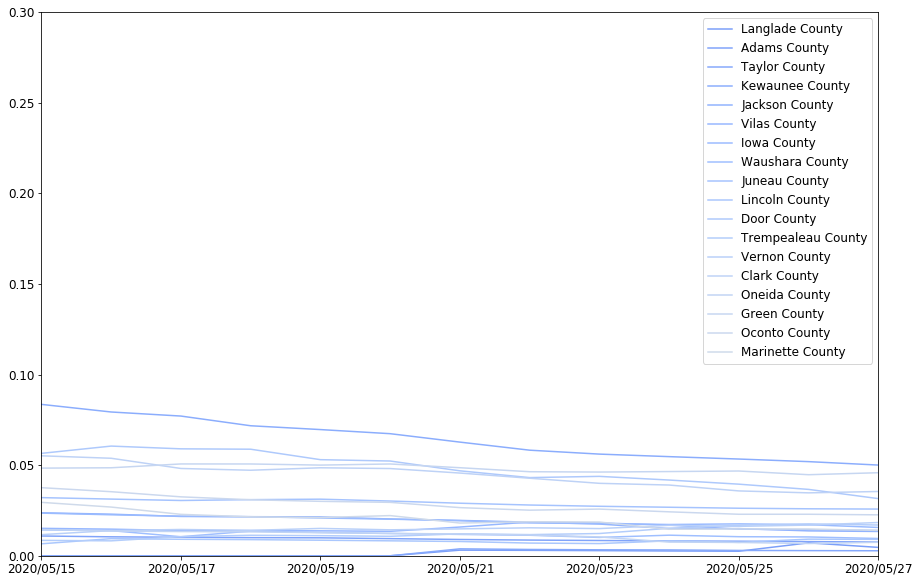

In [93]:
# 2nd quartile of population
# since 2020/05/15

rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(.20, .45, N)))

for i in range(int(len(r)/4), int(len(r)/2)):
    result.loc[r.loc[i][1]][64:].plot(figsize = (15,10), ylim = (0,0.30), legend = True)

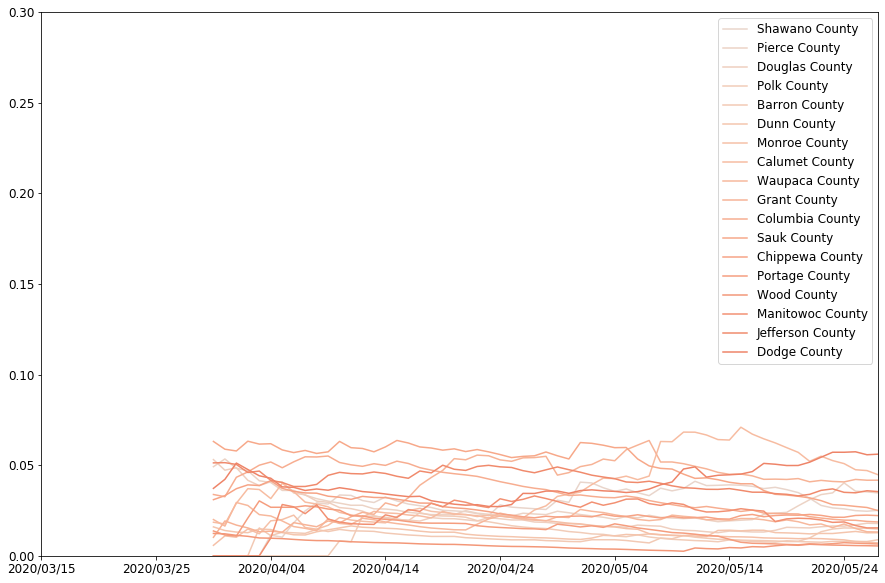

In [33]:
# 3rd quartile of population

rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0.55, 0.80, N)))

for i in range(int(len(r)/2),int(3*len(r)/4)):
    result.loc[r.loc[i][1]][3:].plot(figsize = (15,10), ylim = (0,0.30), legend = True)

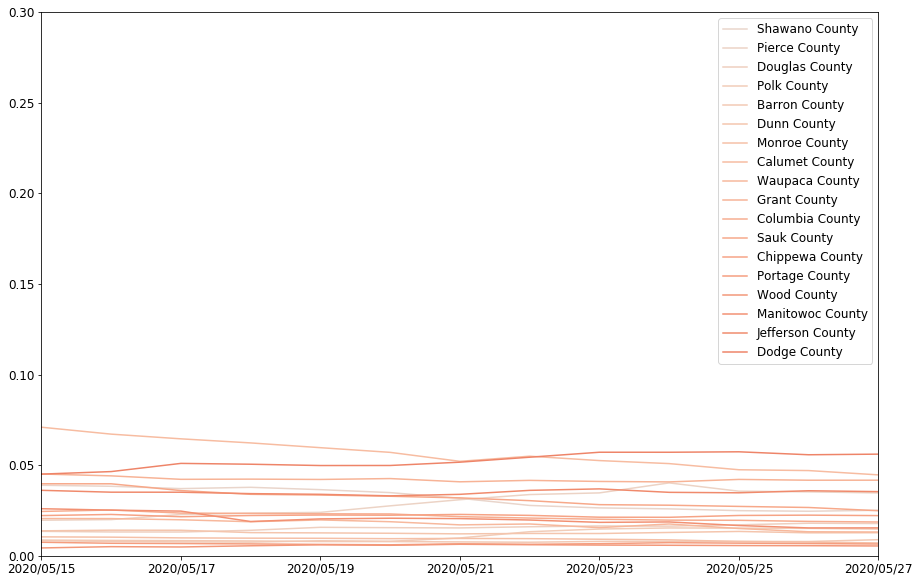

In [94]:
# 3rd quartile of population
# since 2020/05/15

rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0.55, 0.80, N)))

for i in range(int(len(r)/2),int(3*len(r)/4)):
    result.loc[r.loc[i][1]][64:].plot(figsize = (15,10), ylim = (0,0.30), legend = True)

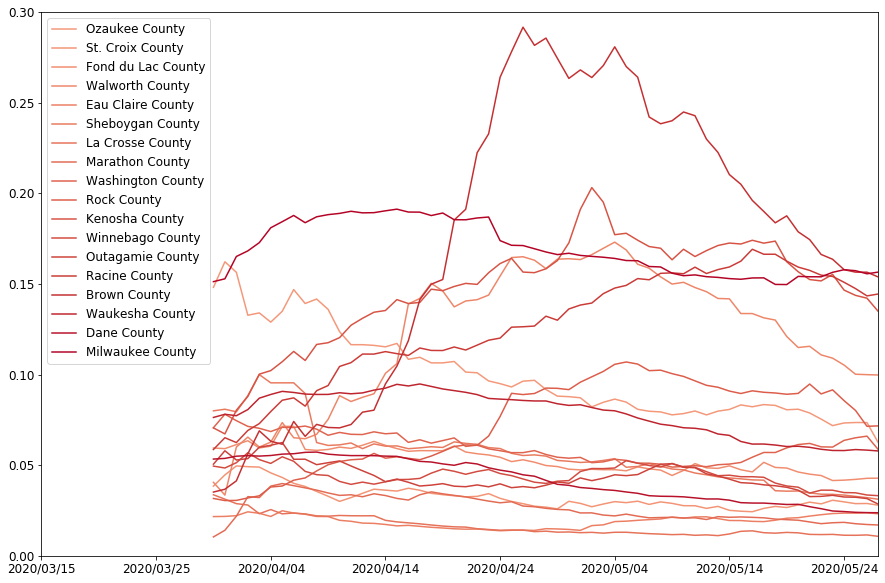

In [34]:
# 4th quartile of population

rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0.75, 1, N)))

for i in range(int(3*len(r)/4),int(len(r))-1):
    result.loc[r.loc[i][1]][3:].plot(figsize = (15,10), ylim = (0,0.30), legend = True)
    


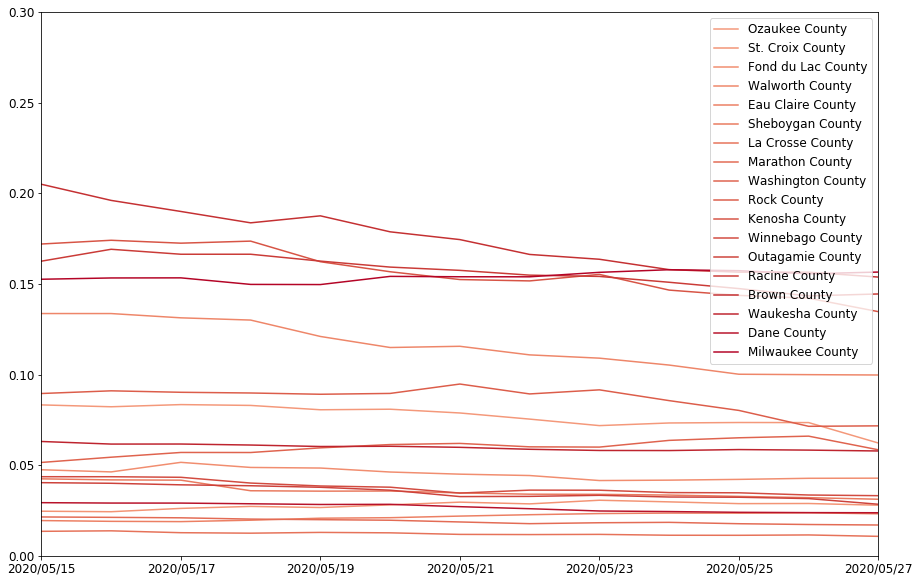

In [95]:
# 4th quartile of population
# since 2020/05/15

rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0.75, 1, N)))

for i in range(int(3*len(r)/4),int(len(r))-1):
    result.loc[r.loc[i][1]][64:].plot(figsize = (15,10), ylim = (0,0.30), legend = True)

In [14]:
# first date = 2020/05/15; Second date = 2020/05/27
# x value positive rate on the first date and y value positive rate on the second date
# The points are colored by population and sized by testing per capita
# Size of the "x" is testing on first date, and size of the circle is testing on the second date

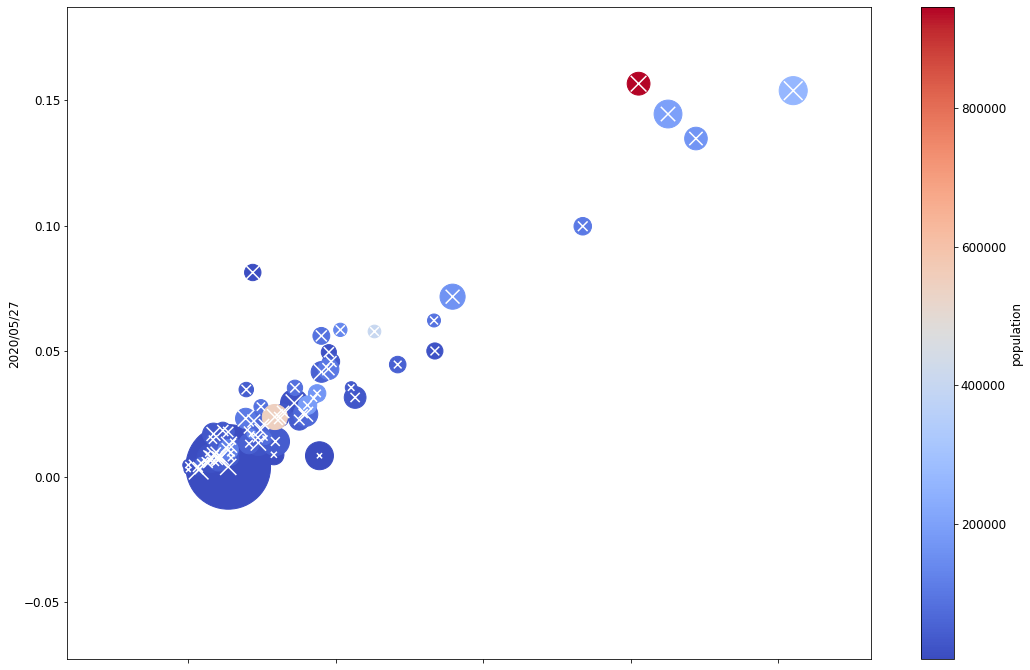

In [102]:
ax = r1.plot.scatter(x = "2020/05/15", y = "2020/05/27", s= (res["2020/05/27"]*500)**2, c = "population", colormap = "coolwarm", figsize = (18,12))
r1.plot.scatter(x = "2020/05/15", y = "2020/05/27", s= (res["2020/05/15"]*500)**2, c = "white", figsize = (18,12), ax =ax, marker = "x")

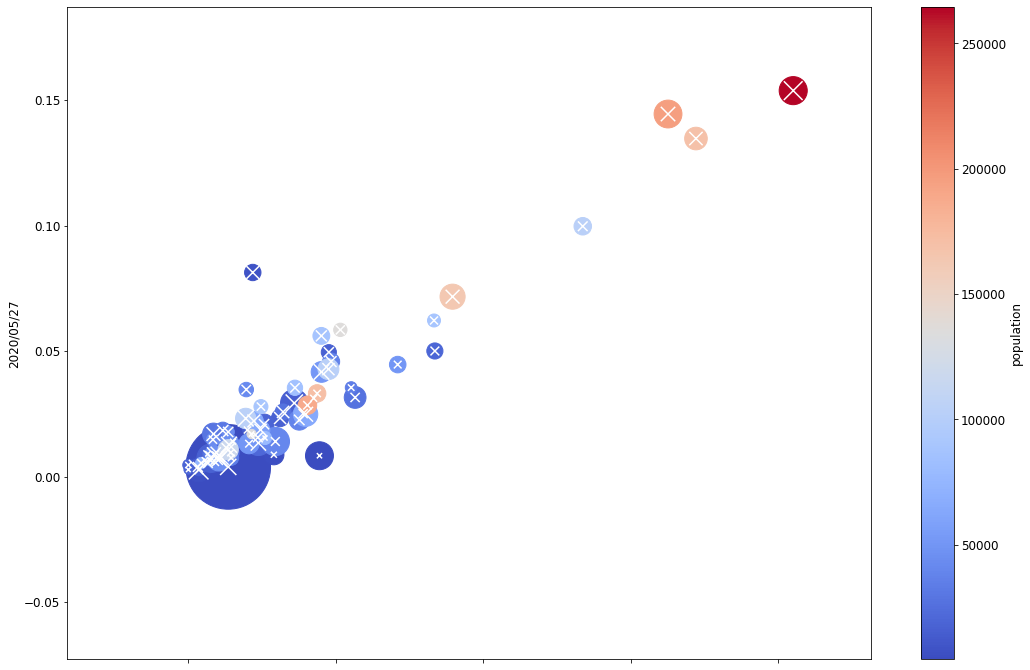

In [106]:
# remove outliers
# when population <= 400000

r2 = []
r3 = []
for i in range(len(r1)):
    if r1["population"][i] <=400000:
        r2.append(r1.iloc[i])
        r3.append(res.iloc[i])
        

r2 = DataFrame(r2)
r3 = DataFrame(r3)
ax = r2.plot.scatter(x = "2020/05/15", y = "2020/05/27", s= (res["2020/05/27"]*500)**2, c = "population", colormap = "coolwarm", figsize = (18,12))
r2.plot.scatter(x = "2020/05/15", y = "2020/05/27", s= (r3["2020/05/15"]*500)**2, c = "white", figsize = (18,12), ax =ax, marker = "x")

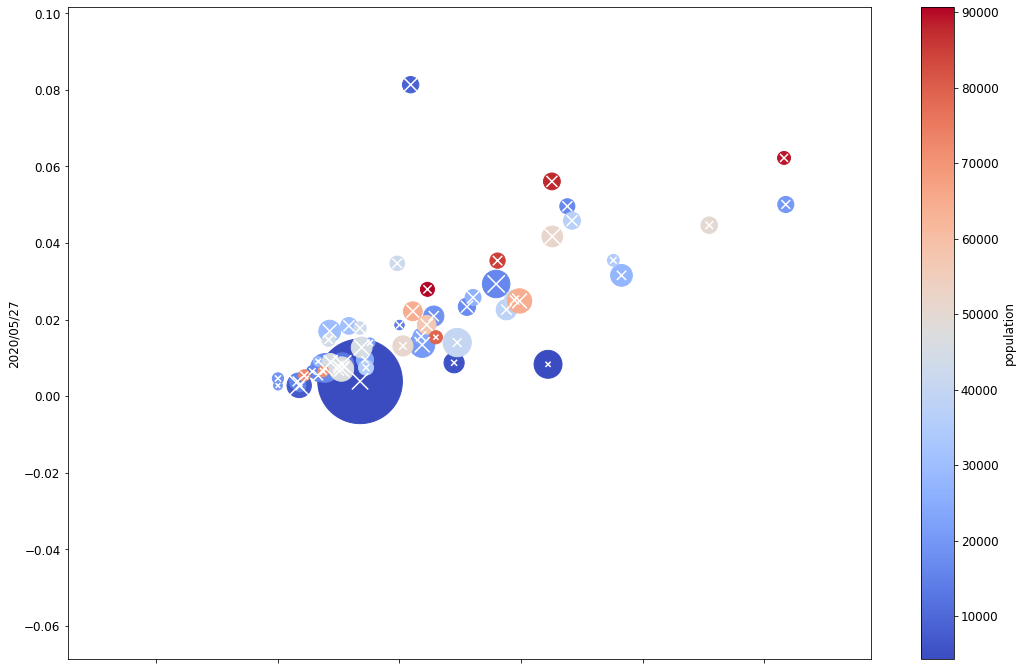

In [107]:
# remove outliers
# when population <= 100000

r2 = []
r3 = []
for i in range(len(r1)):
    if r1["population"][i] <= 100000:
        r2.append(r1.iloc[i])
        r3.append(res.iloc[i])

r2 = DataFrame(r2)
r3 = DataFrame(r3)
ax = r2.plot.scatter(x = "2020/05/15", y = "2020/05/27", s= (res["2020/05/27"]*500)**2, c = "population", colormap = "coolwarm", figsize = (18,12))
r2.plot.scatter(x = "2020/05/15", y = "2020/05/27", s= (r3["2020/05/15"]*500)**2, c = "white", figsize = (18,12), ax =ax, marker = "x")

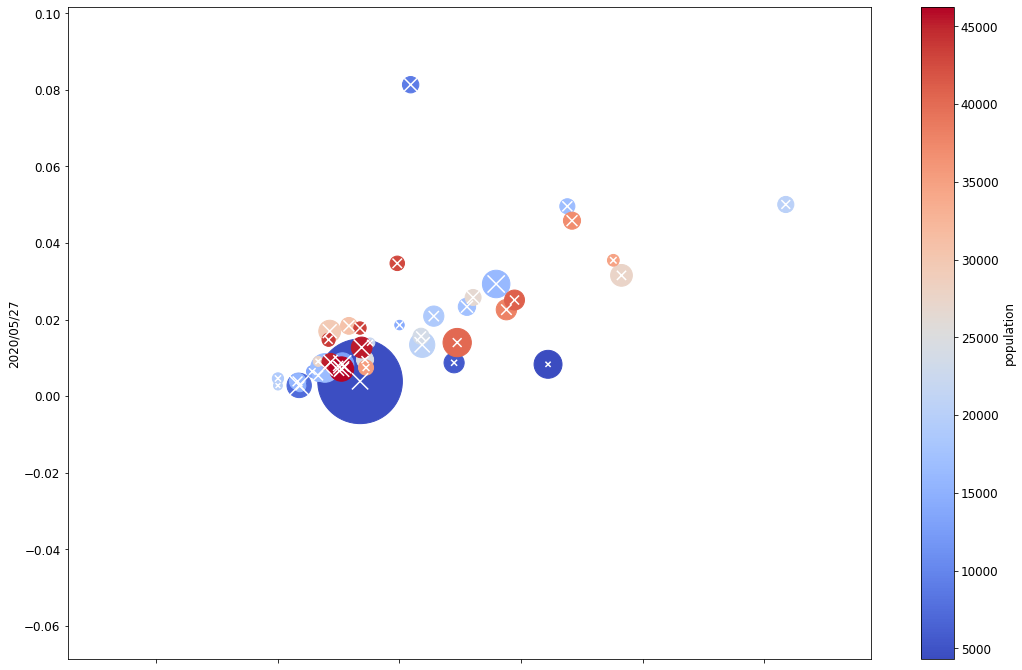

In [109]:
# remove outliers
# when population <= 50000

r2 = []
r3 = []
for i in range(len(r1)):
    if r1["population"][i] <= 50000:
        r2.append(r1.iloc[i])
        r3.append(res.iloc[i])
        

r2 = DataFrame(r2)
r3 = DataFrame(r3)
ax = r2.plot.scatter(x = "2020/05/15", y = "2020/05/27", s= (res["2020/05/27"]*500)**2, c = "population", colormap = "coolwarm", figsize = (18,12))
r2.plot.scatter(x = "2020/05/15", y = "2020/05/27", s= (r3["2020/05/15"]*500)**2, c = "white", figsize = (18,12), ax =ax, marker = "x")

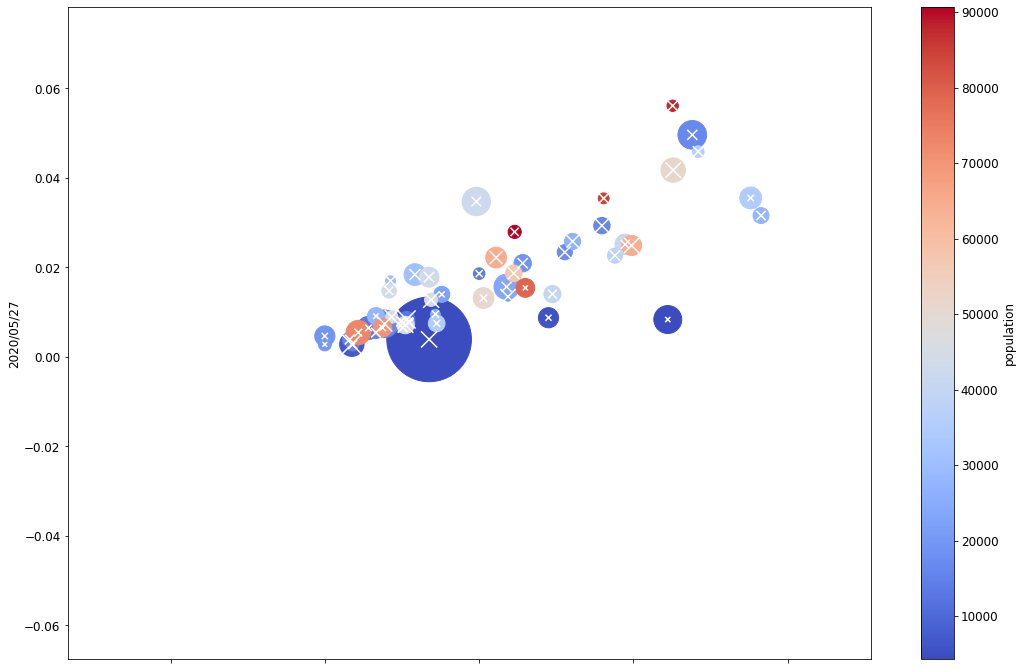

In [111]:
# remove outliers
# when population <= 100000
# when fraction psotive rate on first date <= 0.06
# when fraction psotive rate on Second date <= 0.06



r3 = []
r4 = []
for i in range(len(r1)):
    if r1["2020/05/15"][i] <= 0.06 and r1["2020/05/27"][i] <= 0.06 and r1["population"][i] <=100000:
        r3.append(r1.iloc[i])
        r4.append(res.iloc[i])

r3 = DataFrame(r3)
r4 = DataFrame(r4)
ax = r3.plot.scatter(x = "2020/05/15", y = "2020/05/27", s= (res["2020/05/27"]*500)**2, c = "population", colormap = "coolwarm", figsize = (18,12))
r3.plot.scatter(x = "2020/05/15", y = "2020/05/27", s= (r4["2020/05/15"]*500)**2, c = "white", figsize = (18,12), ax =ax, marker = "x")

In [113]:
# Next 2 graphs show data from the counties data but are ordered accoring to population. I have also attached 
# a fraction positive data graph next to the counties data to compare properly.

rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))

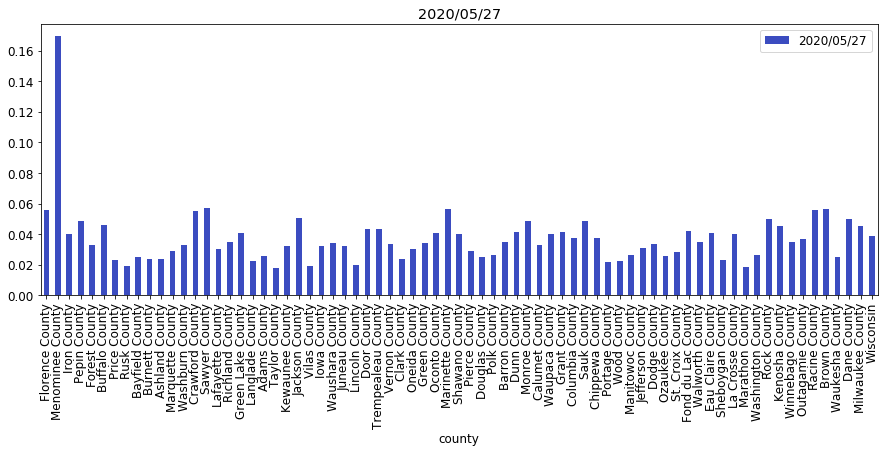

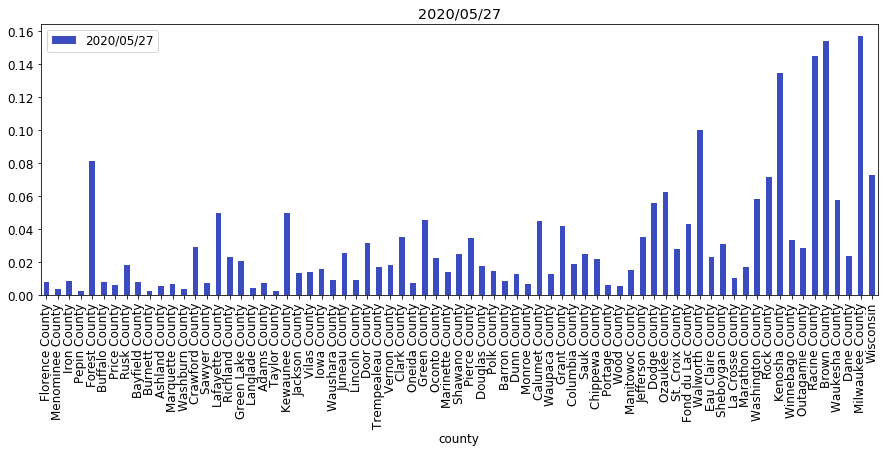

In [114]:
# The following 2 subplots are ordered by population
# Graph Above = tests per capita
# Graph Below = fraction of postive rates

# tests per capita of all counties for a single date orered by population (in this case 2020/05/12)
a = res[["county","2020/05/27"]].plot(x="county", kind="bar",figsize=(15,5), subplots =True)


# fraction of positive tests for all counties on 2020/05/12
# graph is sorted by population in ascending order

b = r[["county","2020/05/27"]].plot(x="county", kind="bar",figsize=(15,5), subplots =True)

Text(0, 0.5, 'tests per capita')

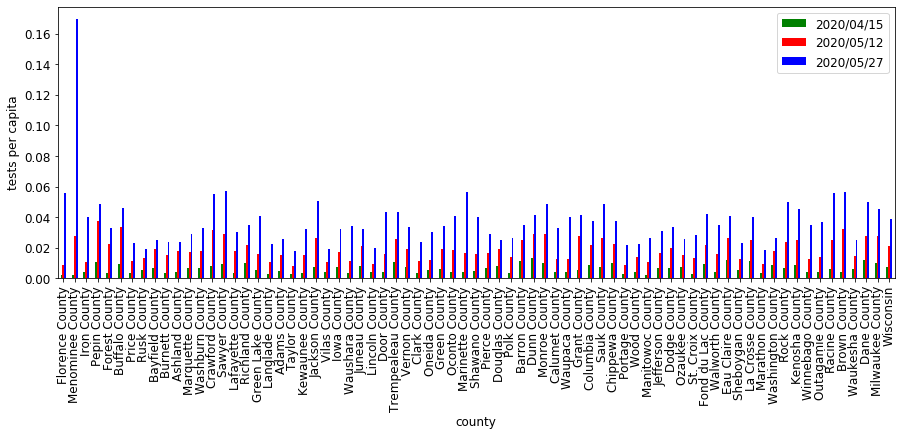

In [115]:
# tests per capita of all counties comparing that of three dates ordered by population

a = res[["county","2020/04/15","2020/05/12", "2020/05/27"]].plot(x="county", kind="bar",figsize=(15,5), color = ("green","red","blue"))
a.set_ylabel("tests per capita")

Text(0, 0.5, 'tests per capita')

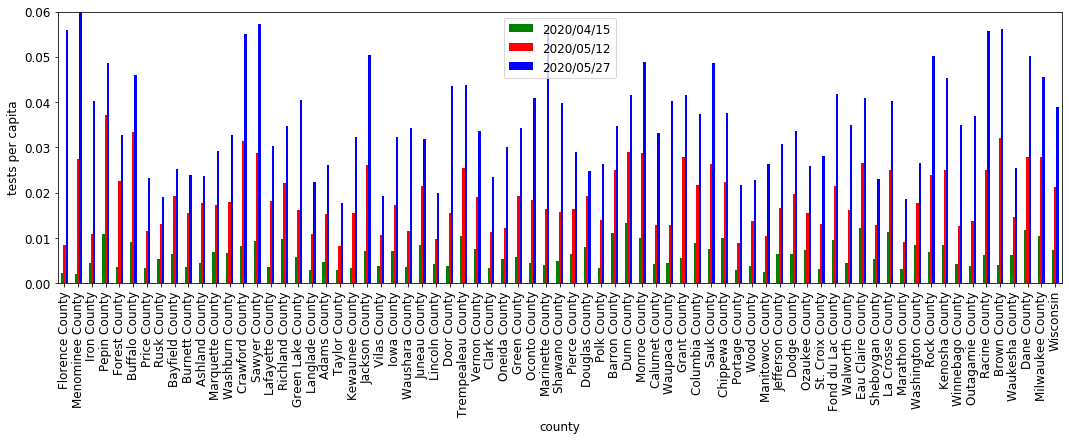

In [116]:
#remove outliers in above graph

a = res[["county","2020/04/15","2020/05/12", "2020/05/27"]].plot(x="county", kind="bar",figsize=(18,5), color = ("green","red","blue"), ylim = (0,0.06))
a.set_ylabel("tests per capita")

Text(0, 0.5, 'tests per capita')

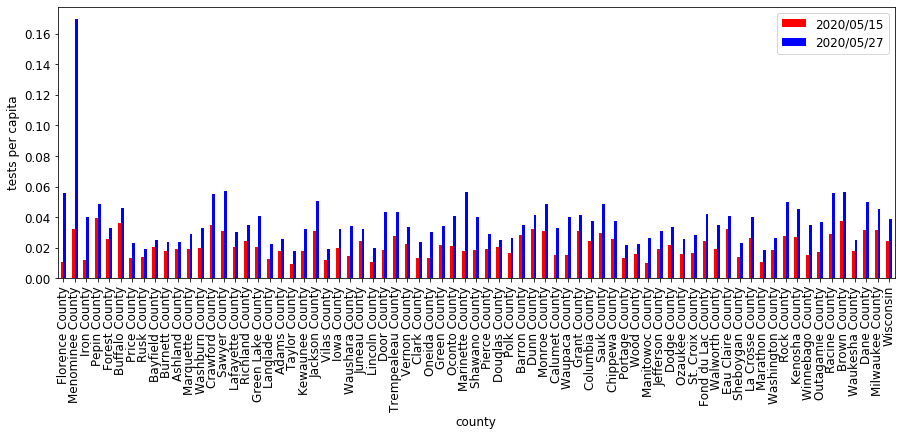

In [117]:
# tests per capita of all counties comparing that of two dates ordered by population

a = res[["county","2020/05/15", "2020/05/27"]].plot(x="county", kind="bar",figsize=(15,5), color = ("red","blue"))
a.set_ylabel("tests per capita")

Text(0, 0.5, 'tests per capita')

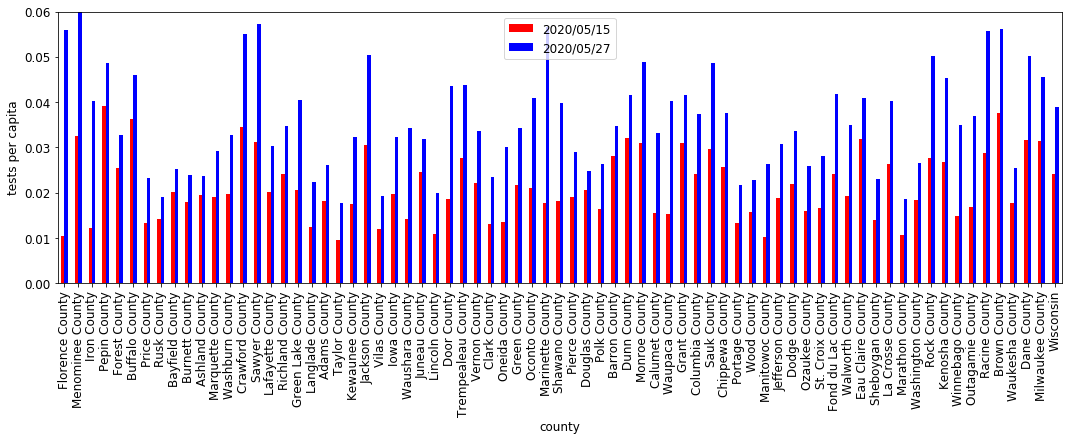

In [118]:
#remove outliers in above graph

a = res[["county","2020/05/15", "2020/05/27"]].plot(x="county", kind="bar",figsize=(18,5), color = ("red","blue"), ylim = (0,0.06))
a.set_ylabel("tests per capita")

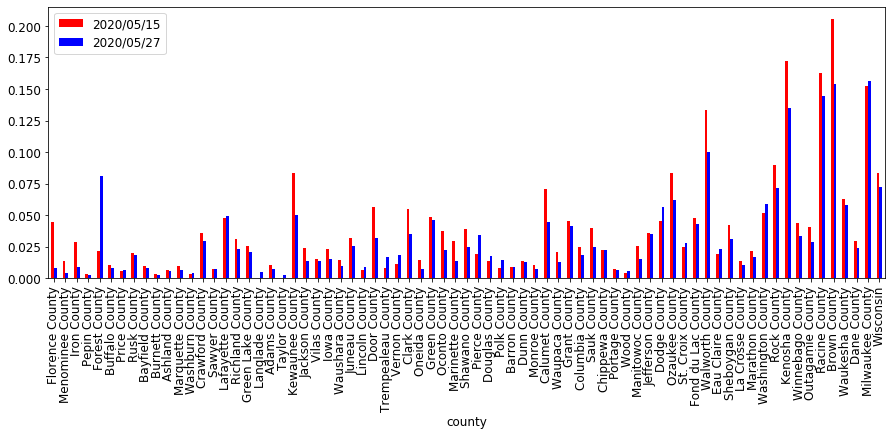

In [119]:
# fraction of positive rate of all counties comparing that of two dates ordered by population

a = r[["county","2020/05/15","2020/05/27"]].plot(x="county", kind="bar",figsize=(15,5), color = ("red","blue"))